In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

import numpy as np

import matplotlib.pyplot as plt

import spacy

In [ ]:
!python -m spacy download el_core_news_sm

In [52]:
start_page = 2
end_page = 4

start_url = 'https://www.newsit.gr/category/ellada/page/'

test_url = start_url + str(start_page)

In [53]:
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [54]:
teaser_articles_list = doc.find('main', {'id': 'main'}).find_all('article')

In [55]:
teaser_articles_list[0]

<article class="">
<div class="image">
<a href="https://www.newsit.gr/ellada/epiasan-30xrono-gia-ratsistiki-epithesi-se-diemfyliki-gynaika/3790160/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/06/xeiropedes_i-1-768x527.jpg');" title="Έπιασαν 30χρονο για ρατσιστική επίθεση σε διεμφυλική γυναίκα"></a>
</div>
<div>
<div class="entry-meta mb-05">
<span class="posted-on">
<time class="entry-date published" datetime="2023-06-04T23:42:43+03:00">
<svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z"></path>
<path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3,0-0.5,0.3-0.5,0.4v3.6c0,0.2,0,0.5,0.3,0.5l1.8,1.4
	c0.1,0.1,0.1,0.1,0.3,0.1s0.3,0,0.3-0.1l0,0V7.8c0.1-0.2,0.1-0.5-0.1-0.6L6.6,6z"></path>
</svg>
 

In [56]:
print(teaser_articles_list[0].prettify())

<article class="">
 <div class="image">
  <a href="https://www.newsit.gr/ellada/epiasan-30xrono-gia-ratsistiki-epithesi-se-diemfyliki-gynaika/3790160/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/06/xeiropedes_i-1-768x527.jpg');" title="Έπιασαν 30χρονο για ρατσιστική επίθεση σε διεμφυλική γυναίκα">
  </a>
 </div>
 <div>
  <div class="entry-meta mb-05">
   <span class="posted-on">
    <time class="entry-date published" datetime="2023-06-04T23:42:43+03:00">
     <svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
      <path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z">
      </path>
      <path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3,0-0.5,0.3-0.5,0.4v3.6c0,0.2,0,0.5,0.3,0.5l1.8,1.4
	c0.1,0.1,0.1,0.1,0.3,0.1s0.3,0,0.3-0.1l0,0V7.8c0.1-0.2

In [57]:
link = teaser_articles_list[0].find('a')['href']
print(link)

https://www.newsit.gr/ellada/epiasan-30xrono-gia-ratsistiki-epithesi-se-diemfyliki-gynaika/3790160/


In [58]:
teasers_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  teaser_articles_list = doc.find('main', {'id': 'main'}).find_all('article')

  for teaser in teaser_articles_list:
      story_dict = {}
      try:
        
        link = teaser.find('a')['href']
        

        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      teasers_list.append(story_dict)
  time.sleep(1)

In [59]:
newsit_teasers_df = pd.DataFrame(teasers_list)
newsit_teasers_df

,url
0,https://www.newsit.gr/ellada/epiasan-30xrono-g...
1,https://www.newsit.gr/ellada/tzoker-klirosi-26...
2,https://www.newsit.gr/ellada/evros-oloklirothi...
3,https://www.newsit.gr/ellada/kairos-ayrio-me-3...
4,https://www.newsit.gr/ellada/4-syllipseis-sto-...
5,https://www.newsit.gr/ellada/tzoker-klirosi-ar...
6,https://www.newsit.gr/ellada/kleistos-o-stathm...
7,https://www.newsit.gr/ellada/koinonikos-touris...
8,https://www.newsit.gr/ellada/nikos-sergianopou...
9,https://www.newsit.gr/ellada/ayti-einai-i-agno...


In [60]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 8 Tsalla Vasilikh 5-3 6.csv', index=False)

In [61]:
article_url = 'https://www.newsit.gr/ellada/kolonos-ksespa-i-mitera-tis-12xronis-mesa-apo-ti-fylaki-an-iksera-oti-oloi-einai-viastes-den-tha-afina-na-pigainei-stin-plateia/3789570/'

In [62]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [63]:
article = doc.find('main', {'class': 'site-main'})
print(article.prettify())

<main class="site-main" id="main">
 <div class="breadcrumbs-container">
  <div class="grid-container grid-parent">
   <p id="breadcrumbs">
    <span>
     <span>
      <a href="https://www.newsit.gr/">
       <span class="home">
        NewsIT
       </span>
      </a>
      <span>
       <a href="https://www.newsit.gr/category/ellada/">
        Ελλαδα
       </a>
       <span aria-current="page" class="breadcrumb_last">
        Ξεσπα η φυλακισμενη μητερα της 12χρονης απο τον Κολωνο! «Αν ηξερα οτι ολοι ειναι βιαστες, δεν θα αφηνα να πηγαινει στην πλατεια»
       </span>
      </span>
     </span>
    </span>
   </p>
  </div>
 </div>
 <article class="post-3789570 post type-post status-publish format-standard has-post-thumbnail category-ellada tag-viasmos-anilikis tag-kolonos tag-mastropeia" id="post-3789570" itemscope="" itemtype="https://schema.org/CreativeWork">
  <div class="inside-article">
   <header class="entry-header">
    <div class="entry-meta">
     <span class="posted-on">
 

In [64]:
title = article.find('h1', {'class': 'entry-title'})
title

<h1 class="entry-title" itemprop="headline">Κολωνός: Ξεσπά η μητέρα της 12χρονης μέσα από τη φυλακή – «Αν ήξερα ότι όλοι είναι βιαστές, δεν θα άφηνα να πηγαίνει στην πλατεία»</h1>

In [65]:
date =article.find('time')['datetime']
date

'2023-06-03T21:40:31+03:00'

In [66]:
paragraphs = article.find_all('p')
paragraphs

[<p id="breadcrumbs"><span><span><a href="https://www.newsit.gr/"><span class="home">NewsIT</span></a> <span><a href="https://www.newsit.gr/category/ellada/">Ελλαδα</a> <span aria-current="page" class="breadcrumb_last">Ξεσπα η φυλακισμενη μητερα της 12χρονης απο τον Κολωνο! «Αν ηξερα οτι ολοι ειναι βιαστες, δεν θα αφηνα να πηγαινει στην πλατεια»</span></span></span></span></p>,
 <p>Σταματημό δεν έχουν οι αποκαλύψεις για την υπόθεση του βιασμού και της μαστροπείας της 12χρονης από τον <a href="https://www.newsit.gr/tags/kolonos/" rel="noopener" target="_blank">Κολωνό</a> που έχει σοκάρει τη χώρα. </p>,
 <p>Ανάμεσα στους τελευταίους οκτώ που συνέλαβε η Αστυνομία είναι και ένας πατέρας δυο παιδιών που κατηγορείται πως ήρθε σε επαφή με την ανήλικη από τον Κολωνό, την εποχή που η σύζυγός του ήταν έγκυος.</p>,
 <p class="advert-badge align-center"></p>,
 <p>«Είναι ψέματα είναι μεγάλο ψέμα ο άντρας μου γνώριζε την κοπέλα ήταν μικρή κοπέλα. Όλα τα αδέρφια της κοπέλας γνωρίζει τη μάνα του, τον 

In [67]:
p_texts_list = []                      # δημιουργία κενής λίστας για να αποθηκεύσουμε το text κάθε παραγράφου
paragraphs = article.find_all('p')     # λίστα με όλες τις παραγράφους
for p in paragraphs:                   # για κάθε μια από τις παραγράφους στη λίστα
  p_texts_list.append(p.text)          # πάρε το .text και πρόσθεσέ το στη λίστα με τα texts των παραγράφων
full_text = ' '.join(p_texts_list)     # συνένωση των texts των παραγράφων
full_text = "".join(full_text.splitlines())
full_text

'NewsIT Ελλαδα Ξεσπα η φυλακισμενη μητερα της 12χρονης απο τον Κολωνο! «Αν ηξερα οτι ολοι ειναι βιαστες, δεν θα αφηνα να πηγαινει στην πλατεια» Σταματημό δεν έχουν οι αποκαλύψεις για την υπόθεση του βιασμού και της μαστροπείας της 12χρονης από τον Κολωνό που έχει σοκάρει τη χώρα.  Ανάμεσα στους τελευταίους οκτώ που συνέλαβε η Αστυνομία είναι και ένας πατέρας δυο παιδιών που κατηγορείται πως ήρθε σε επαφή με την ανήλικη από τον Κολωνό, την εποχή που η σύζυγός του ήταν έγκυος.  «Είναι ψέματα είναι μεγάλο ψέμα ο άντρας μου γνώριζε την κοπέλα ήταν μικρή κοπέλα. Όλα τα αδέρφια της κοπέλας γνωρίζει τη μάνα του, τον πατέρα του τον γνωρίζει», δήλωσε αποκλειστικά στο κεντρικό δελτίο του Star η σύζυγος του εν λόγω συλληφθέντα, ο οποίος μένει σε πολύ κοντινή από το σπίτι του κοριτσιού. «Τους είχε δώσει και λεφτά στα μικρά τα παιδιά, τους έχει αγοράσει και παγωτά γιατί τα λυπόταν», ανέφερε χαρακτηριστικά.  «Είχανε δείξει φωτογραφία στην κοπέλα και είχανε πει “τον γνωρίζεις αυτόν τον άνθρωπο;”. Είχ

In [68]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 8 Tsalla Vasilikh 5-3 6.csv')
newsit_teasers_df.head()

,url
0,https://www.newsit.gr/ellada/epiasan-30xrono-g...
1,https://www.newsit.gr/ellada/tzoker-klirosi-26...
2,https://www.newsit.gr/ellada/evros-oloklirothi...
3,https://www.newsit.gr/ellada/kairos-ayrio-me-3...
4,https://www.newsit.gr/ellada/4-syllipseis-sto-...


In [69]:
full_articles_list = []

for article_url in newsit_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('main', {'class': 'site-main'})
  full_article_dict = {}
  
  # website
  full_article_dict['site'] = "newsit.gr"
  
  # url
  full_article_dict['url'] = article_url


  #title
  try:
    title = title = article.find('h1', {'class': 'entry-title'}).text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = '' 
    pass

  # date
  try:
    date = article.find('time')['datetime']  
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # full_text
  try:
    p_texts_list = []                      
    paragraphs = article.find_all('p')    
    for p in paragraphs:                  
      p_texts_list.append(p.text)      
    full_text = ' '.join(p_texts_list)  
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text  
  except:
    full_article_dict['full_text'] = '' 
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [70]:
newsit_full_articles_df = pd.DataFrame(full_articles_list)
newsit_full_articles_df

,site,url,title,date,full_text
0,newsit.gr,https://www.newsit.gr/ellada/epiasan-30xrono-g...,Έπιασαν 30χρονο για ρατσιστική επίθεση σε διεμ...,2023-06-04T23:42:43+03:00,NewsIT Ελλαδα Επιασαν 30χρονο για ρατσιστικη ε...
1,newsit.gr,https://www.newsit.gr/ellada/tzoker-klirosi-26...,Τζόκερ κλήρωση 2605: Οι τυχεροί αριθμοί σήμερα,2023-06-04T22:14:47+03:00,NewsIT Ελλαδα Τζοκερ κληρωση 2605: Οι τυχεροι ...
2,newsit.gr,https://www.newsit.gr/ellada/evros-oloklirothi...,Έβρος: Ολοκληρώθηκε η επιχείρηση διάσωσης 91 μ...,2023-06-04T21:42:20+03:00,NewsIT Ελλαδα Ολοκληρωθηκε η επιχειρηση διασωσ...
3,newsit.gr,https://www.newsit.gr/ellada/kairos-ayrio-me-3...,Καιρός αύριο: Με 30άρια ανήμερα του Αγίου Πνεύ...,2023-06-04T19:17:00+03:00,NewsIT Ελλαδα Καιρος αυριο: Με 30αρια ανημερα ...
4,newsit.gr,https://www.newsit.gr/ellada/4-syllipseis-sto-...,4 συλλήψεις στο κέντρο της Αθήνας για επίθεση ...,2023-06-04T16:25:45+03:00,NewsIT Ελλαδα 4 συλληψεις στο κεντρο της Αθηνα...
5,newsit.gr,https://www.newsit.gr/ellada/tzoker-klirosi-ar...,Τζόκερ κλήρωση (αρ. 2605) σήμερα 04/06 με 2.50...,2023-06-04T15:13:00+03:00,NewsIT Ελλαδα Τζοκερ κληρωση (αρ. 2605) σημερα...
6,newsit.gr,https://www.newsit.gr/ellada/kleistos-o-stathm...,Κλειστός ο σταθμός Ηράκλειο του ΗΣΑΠ μετά από ...,2023-06-04T15:04:14+03:00,NewsIT Ελλαδα Κλειστος ο σταθμος Ηρακλειο του ...
7,newsit.gr,https://www.newsit.gr/ellada/koinonikos-touris...,Κοινωνικός Τουρισμός 2023: Μέχρι τα μεσάνυχτα ...,2023-06-04T14:33:00+03:00,NewsIT Ελλαδα Κοινωνικος Τουρισμος 2023: Μεχρι...
8,newsit.gr,https://www.newsit.gr/ellada/nikos-sergianopou...,Νίκος Σεργιανόπουλος: 15 χρόνια από τη δολοφον...,2023-06-04T13:23:01+03:00,NewsIT Ελλαδα 15 χρονια απο τη δολοφονια του Ν...
9,newsit.gr,https://www.newsit.gr/ellada/ayti-einai-i-agno...,Αυτή είναι η άγνωστη και απόκοσμη «Μαύρη Τρύπα...,2023-06-04T13:01:00+03:00,NewsIT Ελλαδα Αυτη ειναι η αγνωστη και αποκοσμ...


In [71]:
newsit_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 8 Tsalla Vasilikh 5-3 6.csv', index=False)

In [72]:
newsit_full_articles_df.loc[0, 'full_text']

'NewsIT Ελλαδα Επιασαν 30χρονο για ρατσιστικη επιθεση σε διεμφυλικη γυναικα Εξιχνιάστηκε, από το Τμήμα Αντιμετώπισης Ρατσιστικής Βίας της Διεύθυνσης Ασφάλειας Αττικής, η επίθεση με ρατσιστικά χαρακτηριστικά που έγινε το βράδυ της 29ης Μαΐου, στην Πλατεία Πρωτομαγιάς. Σύμφωνα με την αστυνομία η διεμφυλική γυναίκα δέχτηκε επίθεση με ρατσιστικό κίνητρο από άγνωστο δράστη λόγω της ταυτότητας φύλου της. Ο δράστης την χτύπησε στο πρόσωπο και την τραυμάτισε ενώ χρειάστηκε η μεταφορά της σε νοσοκομείο.  Αστυνομικοί μετά από αναζητήσεις εντόπισαν το απόγευμα της 3ης Ιουνίου έναν 30χρονο αλλοδαπό, ο οποίος ταυτοποιήθηκε ως δράστης της συγκεκριμένης επίθεσης. Σε βάρος του 30χρονου σχηματίστηκε δικογραφία για σωματική βλάβη με ρατσιστικό κίνητρο η οποία θα υποβληθεί στην Εισαγγελία Πρωτοδικών Αθηνών.  ΕΘΝΙΚΕΣ ΕΚΛΟΓΕΣ 2023 Εκλογές 2023: Διαβάστε όλες τις ειδήσεις για τις εθνικές εκλογές της 21ης Μαϊου 2023  ΟΛΕΣ ΟΙ ΕΙΔΗΣΕΙΣ'

In [73]:
newsit_full_articles_df.loc[0, 'date']

'2023-06-04T23:42:43+03:00'

In [74]:
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], format='%Y-%m-%d %H:%M')
newsit_full_articles_df.head()

,site,url,title,date,full_text,datetime
0,newsit.gr,https://www.newsit.gr/ellada/epiasan-30xrono-g...,Έπιασαν 30χρονο για ρατσιστική επίθεση σε διεμ...,2023-06-04T23:42:43+03:00,NewsIT Ελλαδα Επιασαν 30χρονο για ρατσιστικη ε...,2023-06-04 23:42:43+03:00
1,newsit.gr,https://www.newsit.gr/ellada/tzoker-klirosi-26...,Τζόκερ κλήρωση 2605: Οι τυχεροί αριθμοί σήμερα,2023-06-04T22:14:47+03:00,NewsIT Ελλαδα Τζοκερ κληρωση 2605: Οι τυχεροι ...,2023-06-04 22:14:47+03:00
2,newsit.gr,https://www.newsit.gr/ellada/evros-oloklirothi...,Έβρος: Ολοκληρώθηκε η επιχείρηση διάσωσης 91 μ...,2023-06-04T21:42:20+03:00,NewsIT Ελλαδα Ολοκληρωθηκε η επιχειρηση διασωσ...,2023-06-04 21:42:20+03:00
3,newsit.gr,https://www.newsit.gr/ellada/kairos-ayrio-me-3...,Καιρός αύριο: Με 30άρια ανήμερα του Αγίου Πνεύ...,2023-06-04T19:17:00+03:00,NewsIT Ελλαδα Καιρος αυριο: Με 30αρια ανημερα ...,2023-06-04 19:17:00+03:00
4,newsit.gr,https://www.newsit.gr/ellada/4-syllipseis-sto-...,4 συλλήψεις στο κέντρο της Αθήνας για επίθεση ...,2023-06-04T16:25:45+03:00,NewsIT Ελλαδα 4 συλληψεις στο κεντρο της Αθηνα...,2023-06-04 16:25:45+03:00


In [75]:
short_newsit_df = newsit_full_articles_df[['date','full_text' ]]

In [76]:
short_newsit_df.head()

,date,full_text
0,2023-06-04T23:42:43+03:00,NewsIT Ελλαδα Επιασαν 30χρονο για ρατσιστικη ε...
1,2023-06-04T22:14:47+03:00,NewsIT Ελλαδα Τζοκερ κληρωση 2605: Οι τυχεροι ...
2,2023-06-04T21:42:20+03:00,NewsIT Ελλαδα Ολοκληρωθηκε η επιχειρηση διασωσ...
3,2023-06-04T19:17:00+03:00,NewsIT Ελλαδα Καιρος αυριο: Με 30αρια ανημερα ...
4,2023-06-04T16:25:45+03:00,NewsIT Ελλαδα 4 συλληψεις στο κεντρο της Αθηνα...


In [77]:
short_newsit_df['year'] = pd.DatetimeIndex(short_newsit_df['date']).year
short_newsit_df['month'] = pd.DatetimeIndex(short_newsit_df['date']).month
short_newsit_df['day'] = pd.DatetimeIndex(short_newsit_df['date']).day
short_newsit_df['hour'] = pd.DatetimeIndex(short_newsit_df['date']).hour

<ipython-input-77-18b857e41492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_newsit_df['year'] = pd.DatetimeIndex(short_newsit_df['date']).year
<ipython-input-77-18b857e41492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_newsit_df['month'] = pd.DatetimeIndex(short_newsit_df['date']).month
<ipython-input-77-18b857e41492>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<Axes: ylabel='hour'>

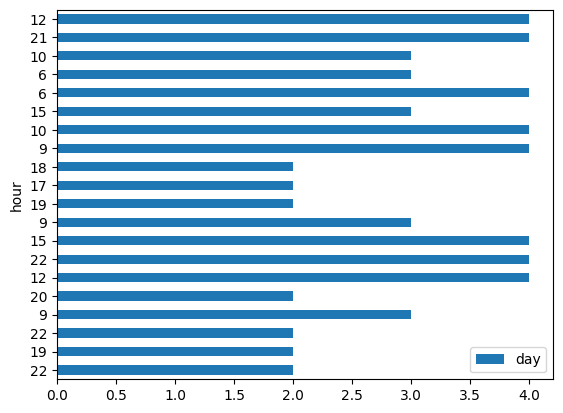

In [95]:
short_newsit_df.sort_values(by='full_text', ascending = False)[:20].plot(kind='barh', y='day', x='hour')

In [79]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [83]:
short_newsit_df[short_newsit_df['day']==3]['full_text']


21    NewsIT Ελλαδα Κληρωση ΛΟΤΤΟ 2419: Αυτοι ειναι ...
22    NewsIT Ελλαδα Βρεθηκαν 80 διαβατηρια που ειχαν...
23    NewsIT Ελλαδα Ξεσπα η φυλακισμενη μητερα της 1...
24    NewsIT Ελλαδα Η ψηφιακη τεχνολογια εκπαιδευει ...
25    NewsIT Ελλαδα Ανακοινωση απο το ΕΔΥΤΑ σχετικα ...
26    NewsIT Ελλαδα Superior Taste Award: Διακριση γ...
27    NewsIT Ελλαδα Παραλιες με Γαλαζιες σημαιες κον...
28    NewsIT Ελλαδα Κληρωση ΛΟΤΤΟ 2419 σημερα Σαββατ...
29    NewsIT Ελλαδα Μεζαπος Μανης: Το δαιδαλωδες λημ...
30    NewsIT Ελλαδα «Οι Πανελληνιες συνεκτιμωνται απ...
31    NewsIT Ελλαδα Εκλογες 2023: Που ψηφιζω, τι ισχ...
32    NewsIT Ελλαδα ΔΥΠΑ: 26 βρεφονηπιακοι σταθμοι σ...
33    NewsIT Ελλαδα Βιντεο ντοκουμεντο απο τη στιγμη...
34    NewsIT Ελλαδα Πανελλαδικες 2023 Μαθηματικα ΕΠΑ...
35    NewsIT Ελλαδα Ιδεες για μονοημερη εκδρομη σε 5...
36    NewsIT Ελλαδα Θεματα Πανελληνιων 2023 ΕΠΑΛ: Τι...
37    NewsIT Ελλαδα Κοινωνικος Τουρισμος 2023: Ποτε ...
38    NewsIT Ελλαδα Συνεληφθη 36χρονος στις Αχαρ

In [82]:
text = short_newsit_df[(short_newsit_df['day'] > 3) & (short_newsit_df['day'] < 4) ]['full_text'].str.cat(sep = ' ') 

In [84]:
import spacy

In [85]:
nlp = spacy.load('el_core_news_sm')

In [86]:
list(nlp.Defaults.stop_words)[0:20]


['συχνήν',
 'ότου',
 'έχει',
 'έχετε',
 'εκείνη',
 'τίποτα',
 'αυτών',
 'ένας',
 'στου',
 'τέτοιος',
 'εκείνον',
 'συχνών',
 'τυχόν',
 'οτιδήποτε',
 'γρήγορα',
 'αυτοί',
 'έκαστος',
 'τώρα',
 'λόγω',
 'είχατε']

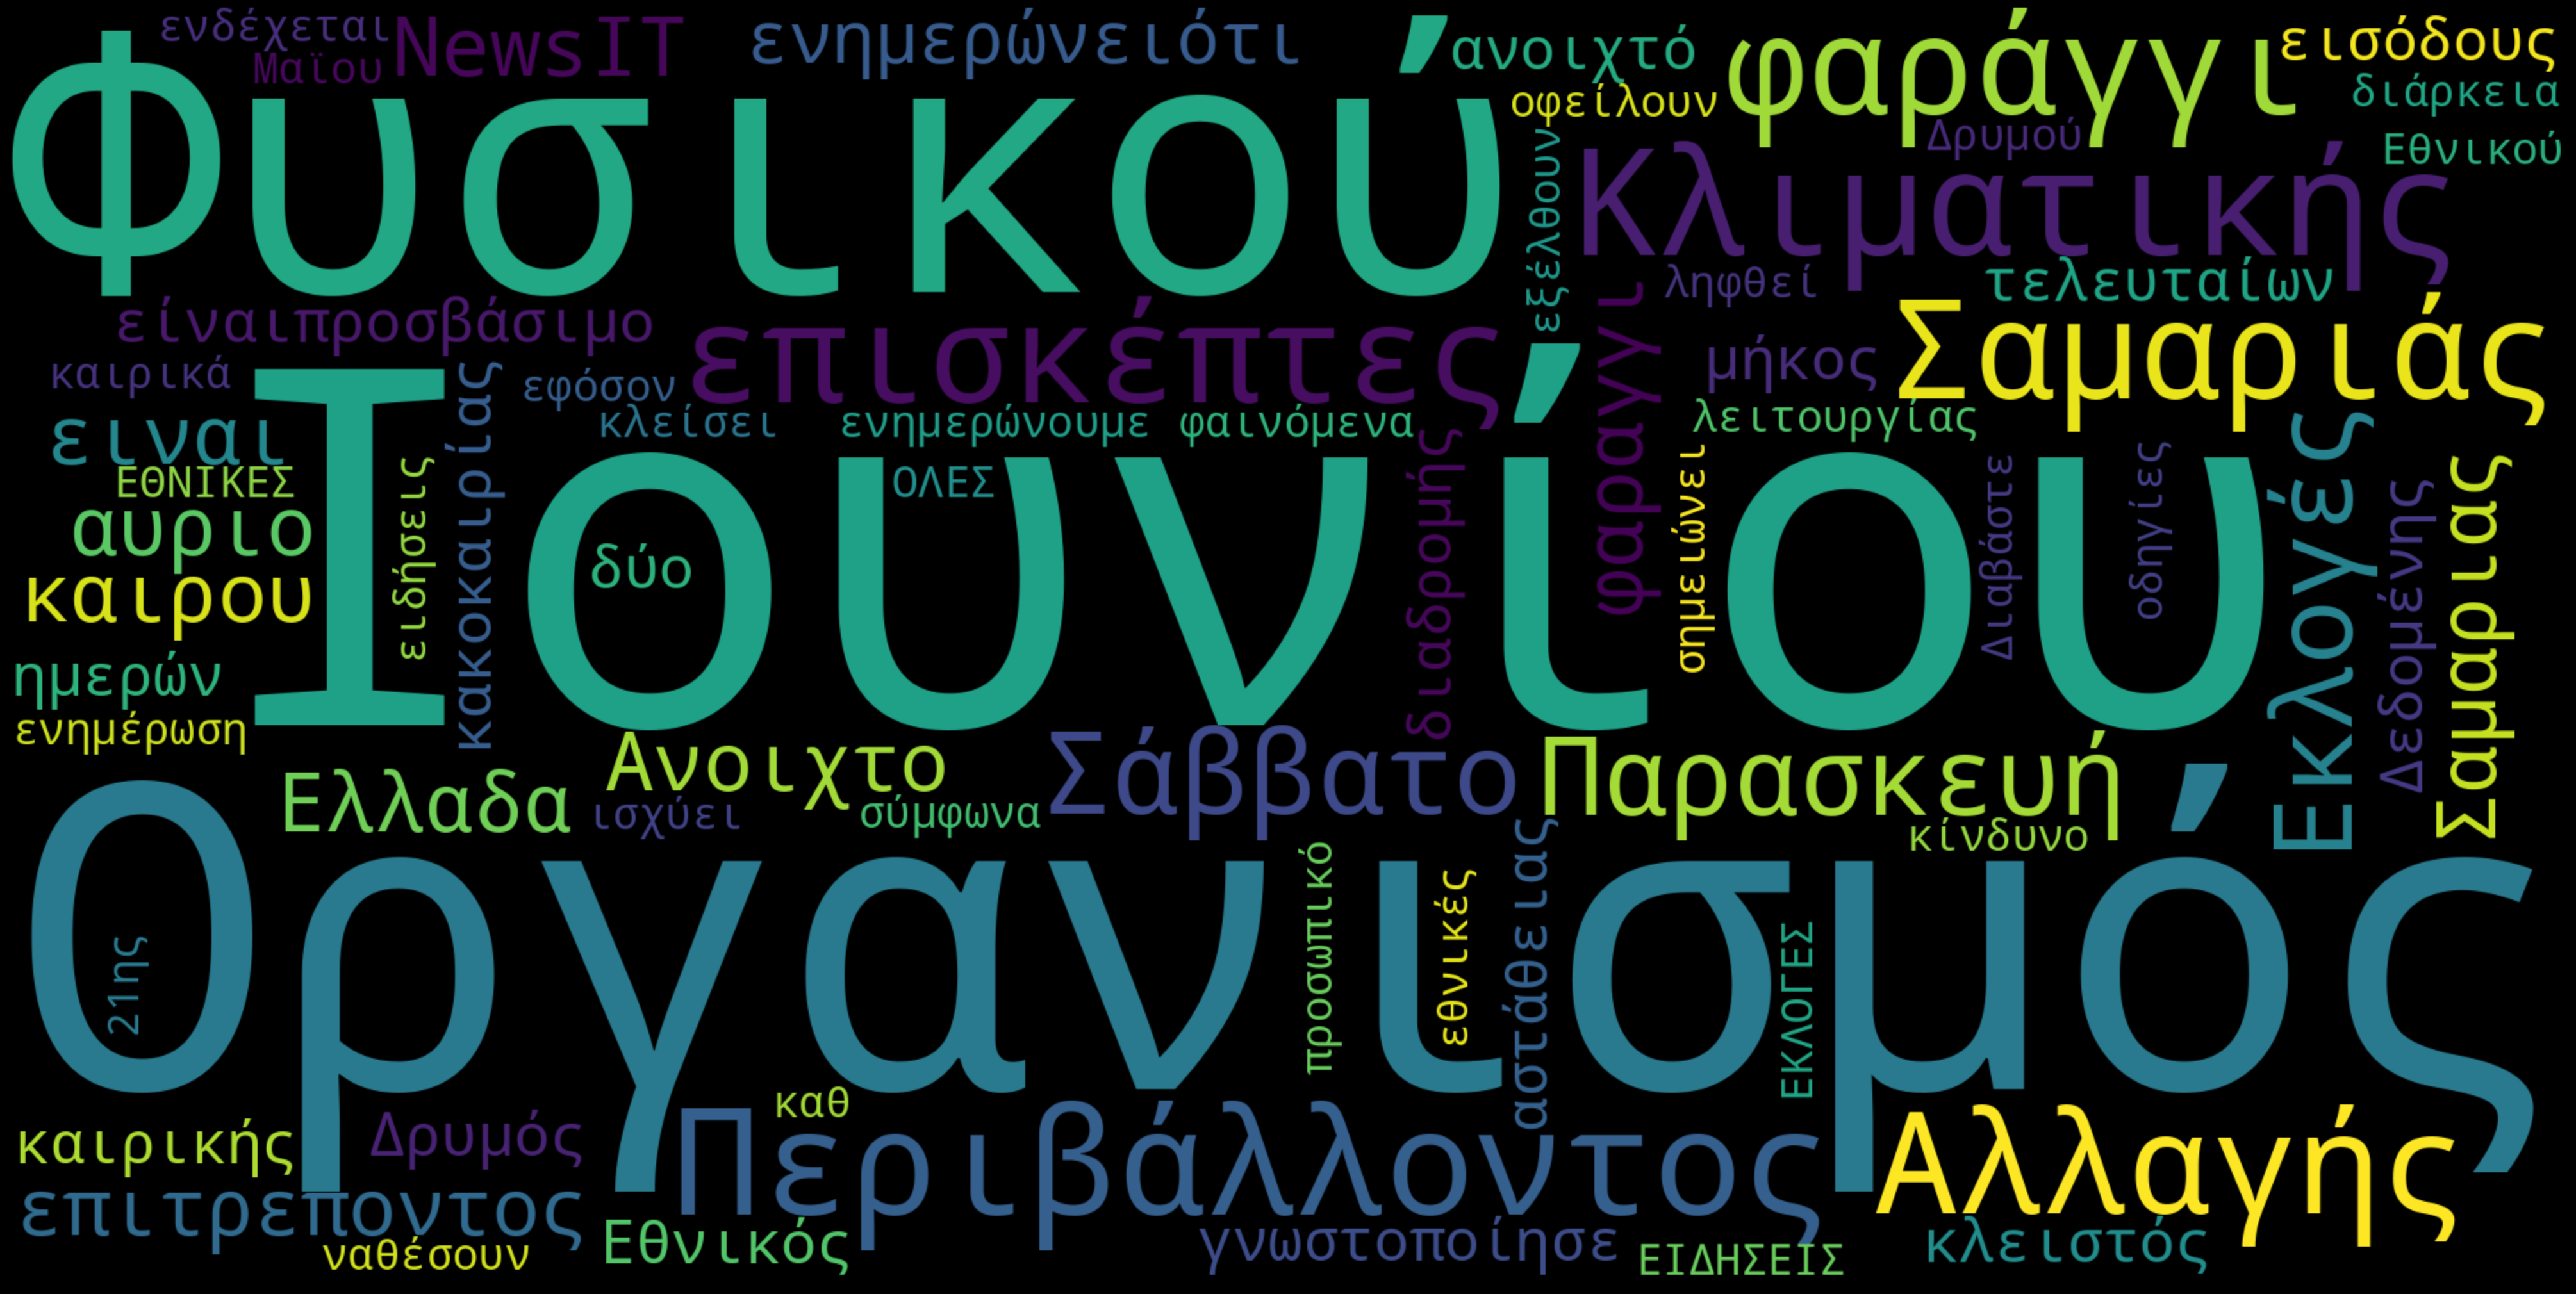

In [89]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(full_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Σύμφωνα με το συννεφόλεξο, για τις ημέρες 3-4/6/20213 στη κατηγορία του ειδησεογραφικού site «NewsIt», στη κατηγορία «Ελλάδα» αναπαρήχθησαν ειδήσεις για ποικίλα θέματα. Μερικές από τις θεματολογίες της κατηγορίας είναι οι καιρικές συνθήκες, το περιβάλλον, η κλιματική αλλαγή και οι επερχόμενες εκλογές της χώρας.